In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc,confusion_matrix,ConfusionMatrixDisplay,f1_score
import pickle
import shap

In [129]:
test1 = pd.read_csv("test1.csv")
x_test1 = test1.drop(['aa_ProtPosition', 'domain','p_interface','uniprot_id','Rlength'], axis=1)
y_test1 = test1.p_interface

In [130]:
train1 = pd.read_csv("train1.csv")
x_train1 = train1.drop(['aa_ProtPosition', 'domain','p_interface','uniprot_id','Rlength'], axis=1)
y_train1 = train1.p_interface

In [127]:
rf = RandomForestClassifier(random_state=0)

In [128]:
rf.fit(x_train1, y_train1)
rf_predictions = rf.predict(x_test1)
print("Accuracy of Random Forest:", accuracy_score(y_test1, rf_predictions))

Accuracy of Random Forest: 0.8759159745969711


In [129]:
y_rf_prob = rf.predict_proba(x_test1)[:, 1]
roc_rf = roc_curve(y_test1, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))

AUC of Random Forest: 0.6980350308498918


In [130]:
cm = confusion_matrix(y_test1, rf_predictions, labels=rf.classes_)

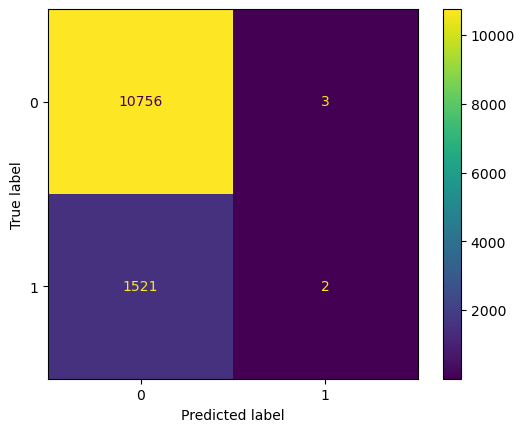

In [131]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [131]:
x = pd.read_csv("rus_x.csv")
y = pd.read_csv("rus_y.csv")
y=y.to_numpy().ravel()

In [132]:
rf = RandomForestClassifier(random_state=0)
params = {'n_estimators': 140, 'max_depth': 10, 'criterion': 'gini'}
rf.set_params(**params)

RandomForestClassifier(max_depth=10, n_estimators=140, random_state=0)

In [133]:
rf.fit(x,y)
rf_predictions = rf.predict(x_test1)
print("Accuracy of Random Forest:", accuracy_score(y_test1, rf_predictions))

Accuracy of Random Forest: 0.6040547142159257


In [134]:
y_rf_prob = rf.predict_proba(x_test1)[:, 1]
roc_rf = roc_curve(y_test1, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))

AUC of Random Forest: 0.7099750719472778


In [135]:
f1 = f1_score(y_test1,rf_predictions)
print("f1 score of Random Forest:",f1)

f1 score of Random Forest: 0.30677120456165363


In [125]:
cm = confusion_matrix(y_test1, rf_predictions, labels=rf.classes_)

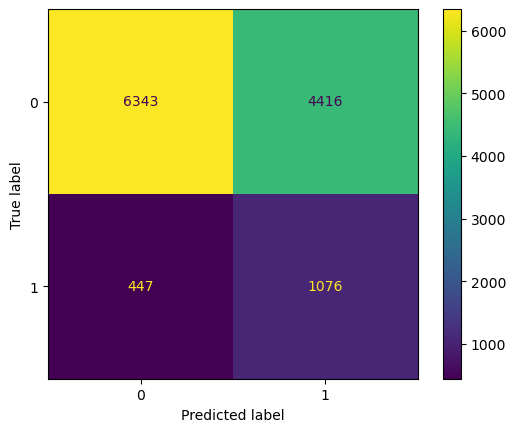

In [126]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [58]:
cv = StratifiedKFold(5)
min_features_to_select = 1
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select
)
rfecv.fit(x, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 140


In [ ]:
cv_results = pd.DataFrame(rfecv.cv_results_)
cv_results["n_features"] = list(range(1,152))

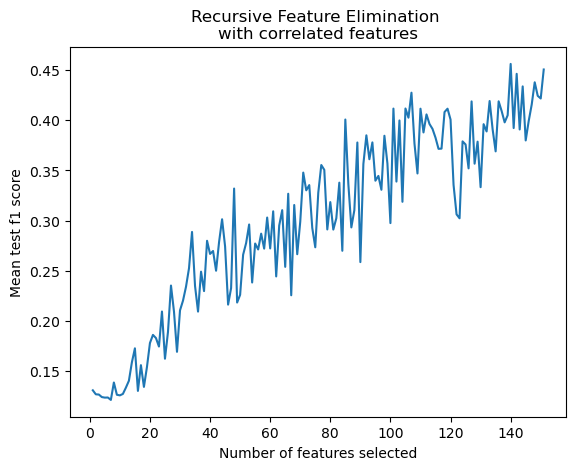

In [151]:
cv_results = pd.DataFrame(rfecv.cv_results_)
cv_results["n_features"] = list(range(1,152))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test f1 score")
plt.plot(cv_results["n_features"],cv_results["mean_test_score"])
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [136]:
feature_importance = zip(rf.feature_names_in_,rf.feature_importances_)
lst =list(feature_importance)
lst = dict(lst)

In [140]:
keys = list(lst.keys())
vals = list(lst.values())

lst['wm_normalized_abs_surf_acc'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_normalized_abs_surf_acc'):
        lst['wm_normalized_abs_surf_acc'] += lst[keys[i]]


lst['wm_normalized_hydropathy_index'] = 0
for i in  range(len(keys)):
    if keys[i].endswith('wm_normalized_hydropathy_index'):
        lst['wm_normalized_hydropathy_index'] += lst[keys[i]]


lst['wm_rel_surf_acc'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_rel_surf_acc'):
        lst['wm_rel_surf_acc'] += lst[keys[i]]


lst['wm_prob_sheet'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_sheet'):
        lst['wm_prob_sheet'] += lst[keys[i]]


lst['wm_prob_helix'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_helix'):
        lst['wm_prob_helix'] += lst[keys[i]]


lst['wm_prob_coil'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_coil'):
        lst['wm_prob_coil'] += lst[keys[i]]


lst['wm_pssm_A'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_A'):
        lst['wm_pssm_A'] += lst[keys[i]]


lst['wm_pssm_R'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_R'):
        lst['wm_pssm_R'] += lst[keys[i]]


lst['wm_pssm_N'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_N'):
        lst['wm_pssm_N'] += lst[keys[i]]


lst['wm_pssm_D'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_D'):
        lst['wm_pssm_D'] += lst[keys[i]]


lst['wm_pssm_C'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_C'):
        lst['wm_pssm_C'] += lst[keys[i]]


lst['wm_pssm_Q'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_Q'):
        lst['wm_pssm_Q'] += lst[keys[i]]


lst['wm_pssm_E'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_E'):
        lst['wm_pssm_E'] += lst[keys[i]]


lst['wm_pssm_G'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_G'):
        lst['wm_pssm_G'] += lst[keys[i]]


lst['wm_pssm_H'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_H'):
        lst['wm_pssm_H'] += lst[keys[i]]


lst['wm_pssm_I'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_I'):
        lst['wm_pssm_I'] += lst[keys[i]]


lst['wm_pssm_L'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_L'):
        lst['wm_pssm_L'] += lst[keys[i]]


lst['wm_pssm_K'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_K'):
        lst['wm_pssm_K'] += lst[keys[i]]


lst['wm_pssm_M'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_M'):
        lst['wm_pssm_M'] += lst[keys[i]]


lst['wm_pssm_F'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_F'):
        lst['wm_pssm_F'] += lst[keys[i]]


lst['wm_pssm_P'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_P'):
        lst['wm_pssm_P'] += lst[keys[i]]


lst['wm_pssm_S'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_S'):
        lst['wm_pssm_S'] += lst[keys[i]]


lst['wm_pssm_T'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_T'):
        lst['wm_pssm_T'] += lst[keys[i]]


lst['wm_pssm_W'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_W'):
        lst['wm_pssm_W'] += lst[keys[i]]


lst['wm_pssm_Y'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_Y'):
        lst['wm_pssm_Y'] += lst[keys[i]]


lst['wm_pssm_V'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_V'):
        lst['wm_pssm_V'] += lst[keys[i]]

lst['sum_sequence'] = 0
for i in range(len(keys)):
    if keys[i].startswith('sequence'):
        lst['sum_sequence'] += lst[keys[i]]

for i in range(len(keys)):
    if keys[i].startswith('3_wm') or keys[i].startswith('5_wm') or keys[i].startswith('7_wm') or keys[i].startswith('9_wm') or keys[i].startswith('sequence'):
        del lst[keys[i]]

In [142]:
lst["sequence"] = lst.pop("sum_sequence")

Text(0.5, 1.0, 'Feature Importance of Original Model')

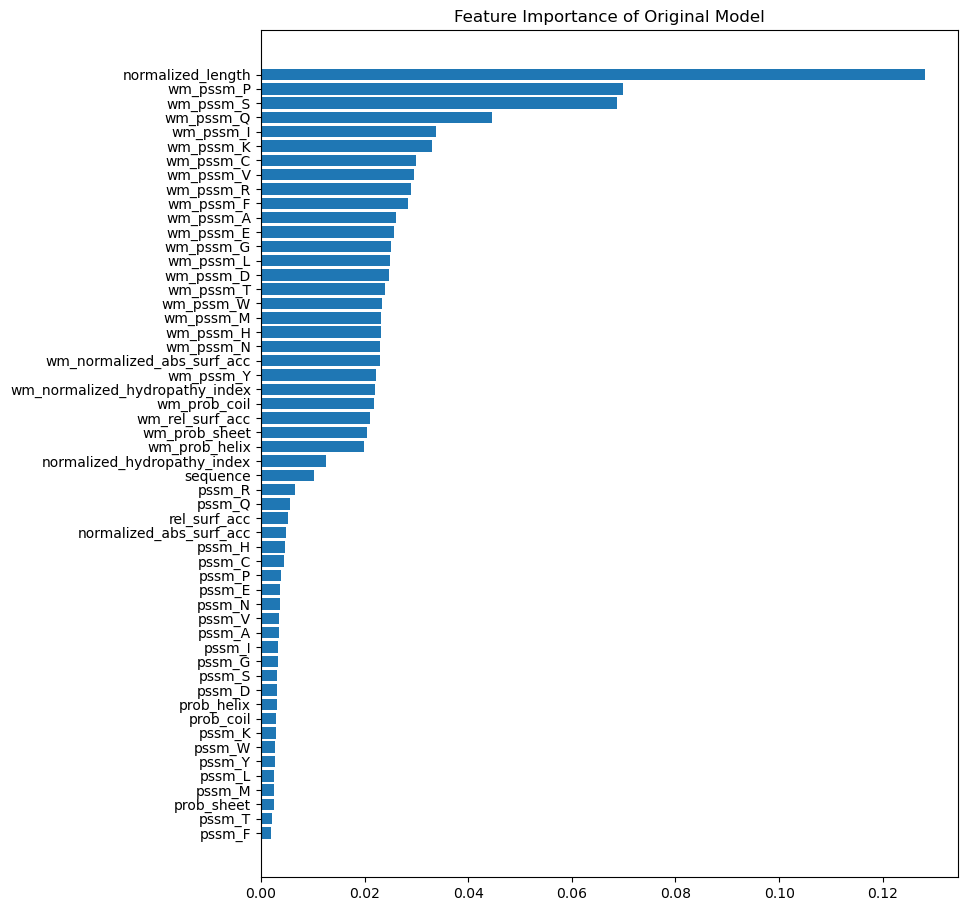

In [144]:
names = list(lst.keys())
importance = list(lst.values())
sorted_idx = np.argsort(importance)
fig = plt.figure(figsize=(9, 11))
plt.barh(range(len(sorted_idx)), np.array(importance)[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(names)[sorted_idx])
plt.title('Feature Importance of Original Model')

In [133]:
import pickle
with open("nearmiss.pickle", "rb") as file:
    nm_x, nm_y = pickle.load(file)

In [140]:
rf = RandomForestClassifier(random_state=0)
params = {'n_estimators': 260, 'max_depth': 10, 'criterion': 'gini'}
rf.set_params(**params)

RandomForestClassifier(max_depth=10, n_estimators=260, random_state=0)

In [141]:
rf.fit(nm_x,nm_y)
rf_predictions = rf.predict(x_test1)
print("Accuracy of Random Forest:", accuracy_score(y_test1, rf_predictions))

Accuracy of Random Forest: 0.31411822178798243


In [142]:
y_rf_prob = rf.predict_proba(x_test1)[:, 1]
roc_rf = roc_curve(y_test1, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))

AUC of Random Forest: 0.49067369089275653


In [143]:
cm = confusion_matrix(y_test1, rf_predictions, labels=rf.classes_)

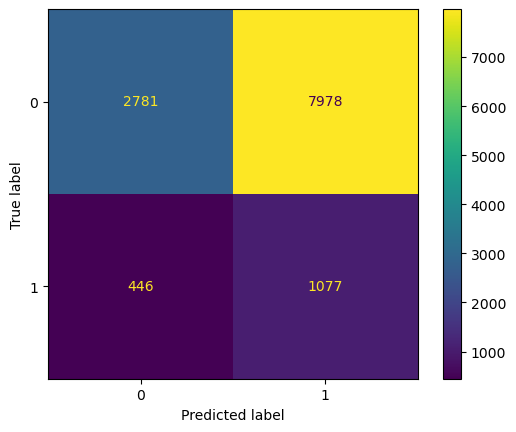

In [144]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [153]:
with open("smotenc.pickle", "rb") as file:
    smote_x, smote_y = pickle.load(file)

In [159]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
params = {'n_estimators': 220, 'max_depth': 60, 'criterion': 'gini'}
rf.set_params(**params)

RandomForestClassifier(max_depth=60, n_estimators=220, n_jobs=-1,
                       random_state=0)

In [160]:
rf.fit(smote_x,smote_y)
rf_predictions = rf.predict(x_test1)
print("Accuracy of Random Forest:", accuracy_score(y_test1, rf_predictions))

Accuracy of Random Forest: 0.8681810780003257


In [161]:
y_rf_prob = rf.predict_proba(x_test1)[:, 1]
roc_rf = roc_curve(y_test1, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))

AUC of Random Forest: 0.7009900611847083


In [162]:
f1 = f1_score(y_test1,rf_predictions)
print("f1 score of Random Forest:",f1)

f1 score of Random Forest: 0.098050139275766


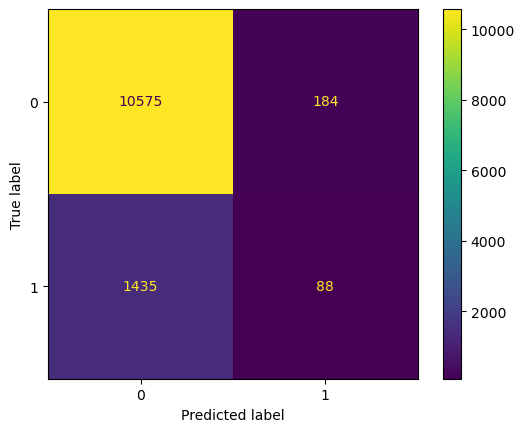

In [163]:
cm = confusion_matrix(y_test1, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [164]:
with open("smoteenn.pickle", "rb") as file:
    sme_x, sme_y = pickle.load(file)

In [176]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
params = {'n_estimators': 260, 'max_depth': 50, 'criterion': 'gini'}
rf.set_params(**params)

RandomForestClassifier(max_depth=50, n_estimators=260, n_jobs=-1,
                       random_state=0)

In [177]:
rf.fit(sme_x,sme_y)
rf_predictions = rf.predict(x_test1)
print("Accuracy of Random Forest:", accuracy_score(y_test1, rf_predictions))

Accuracy of Random Forest: 0.6551864517179612


In [178]:
y_rf_prob = rf.predict_proba(x_test1)[:, 1]
roc_rf = roc_curve(y_test1, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))

AUC of Random Forest: 0.687584649465393


In [179]:
f1 = f1_score(y_test1,rf_predictions)
print("f1 score of Random Forest:",f1)

f1 score of Random Forest: 0.29988427839312287


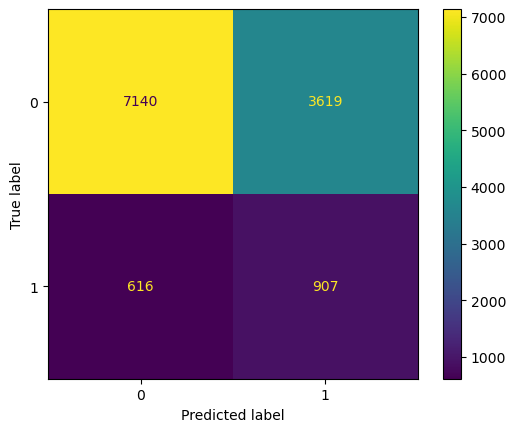

In [180]:
cm = confusion_matrix(y_test1, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
cv = StratifiedKFold(5)
min_features_to_select = 1
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select
)
rfecv.fit(sme_x, sme_y)

print(f"Optimal number of features: {rfecv.n_features_}")

In [ ]:
cv_results = pd.DataFrame(rfecv.cv_results_)
cv_results["n_features"] = list(range(1,152))

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test f1 score")
plt.plot(cv_results["n_features"],cv_results["mean_test_score"])
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [3]:
import pickle
with open("RUS2.pickle", "rb") as file:
    rus2_x, rus2_y = pickle.load(file)

In [9]:
test2 = pd.read_csv("test2.csv")
x_test2 = test2.drop(['aa_ProtPosition', 'domain','p_interface','uniprot_id','Rlength'], axis=1)
y_test2 = test2.p_interface

In [10]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
params = {'n_estimators': 140, 'max_depth': 10, 'criterion': 'gini'}
rf.set_params(**params)

RandomForestClassifier(max_depth=10, n_estimators=140, n_jobs=-1,
                       random_state=0)

Accuracy of Random Forest: 0.5968897573685068
AUC of Random Forest: 0.711747321197047
f1 score of Random Forest: 0.30745558819415303


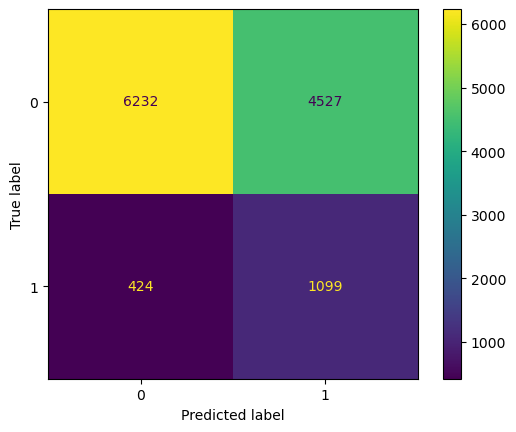

In [12]:
rf.fit(rus2_x,rus2_y)
rf_predictions = rf.predict(x_test2)
print("Accuracy of Random Forest:", accuracy_score(y_test2, rf_predictions))
y_rf_prob = rf.predict_proba(x_test2)[:, 1]
roc_rf = roc_curve(y_test2, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))
f1 = f1_score(y_test2,rf_predictions)
print("f1 score of Random Forest:",f1)
cm = confusion_matrix(y_test2, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [13]:
cv = StratifiedKFold(5)
min_features_to_select = 1
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select
)
rfecv.fit(rus2_x, rus2_y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 130


ValueError: Length of values (151) does not match length of index (138)

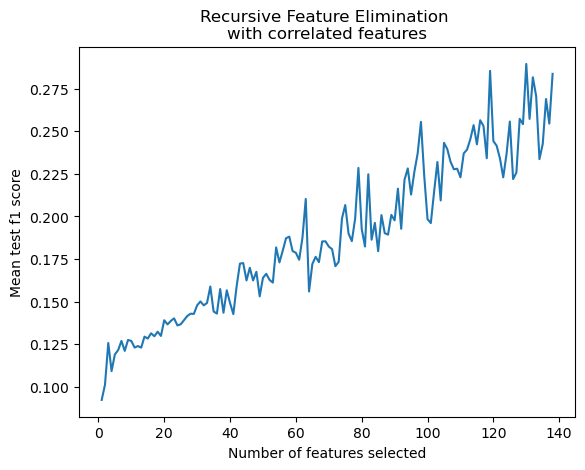

In [14]:
cv_results = pd.DataFrame(rfecv.cv_results_)
cv_results["n_features"] = list(range(1,139))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test f1 score")
plt.plot(cv_results["n_features"],cv_results["mean_test_score"])
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [19]:
rfecv.feature_names_in_

array(['sequence_1', 'sequence_2', 'sequence_3', 'sequence_4',
       'sequence_5', 'sequence_6', 'sequence_7', 'normalized_length',
       'normalized_abs_surf_acc', 'normalized_hydropathy_index',
       'rel_surf_acc', 'prob_sheet', 'prob_helix', 'prob_coil', 'pssm_A',
       'pssm_R', 'pssm_N', 'pssm_D', 'pssm_C', 'pssm_Q', 'pssm_E',
       'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L', 'pssm_K', 'pssm_M',
       'pssm_F', 'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W', 'pssm_Y',
       'pssm_V', '3_wm_normalized_abs_surf_acc',
       '5_wm_normalized_abs_surf_acc', '7_wm_normalized_abs_surf_acc',
       '9_wm_normalized_abs_surf_acc', '3_wm_normalized_hydropathy_index',
       '5_wm_normalized_hydropathy_index',
       '7_wm_normalized_hydropathy_index',
       '9_wm_normalized_hydropathy_index', '3_wm_rel_surf_acc',
       '5_wm_rel_surf_acc', '7_wm_rel_surf_acc', '9_wm_rel_surf_acc',
       '3_wm_prob_sheet', '5_wm_prob_sheet', '7_wm_prob_sheet',
       '9_wm_prob_sheet', '3_wm_prob_helix', '5_

In [21]:
rfecv.ranking_

array([4, 7, 8, 6, 2, 5, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [22]:
rf.feature_importances_

array([0.00112228, 0.0004715 , 0.00027842, 0.00052199, 0.00221375,
       0.00038781, 0.00022982, 0.12257639, 0.00466644, 0.01486102,
       0.0060986 , 0.0030885 , 0.00316879, 0.00288596, 0.00318771,
       0.00701351, 0.0028196 , 0.00313502, 0.00426185, 0.0062294 ,
       0.00370624, 0.00379264, 0.00552357, 0.002663  , 0.00226222,
       0.00357423, 0.0023615 , 0.00188566, 0.00465812, 0.00260674,
       0.00254077, 0.00269521, 0.00274241, 0.00357656, 0.00474952,
       0.00435411, 0.00570346, 0.00545648, 0.00428664, 0.00546001,
       0.00642465, 0.00786807, 0.00453691, 0.00507222, 0.00510745,
       0.0047823 , 0.00406137, 0.00442781, 0.00541303, 0.0058206 ,
       0.00446751, 0.00452263, 0.00508821, 0.00490814, 0.00421721,
       0.00435843, 0.00499662, 0.00607805, 0.00396793, 0.00598802,
       0.00455966, 0.00500075, 0.00639661, 0.00652472, 0.00538893,
       0.00529944, 0.00515031, 0.00571539, 0.00524251, 0.00437753,
       0.00446978, 0.00520971, 0.01111302, 0.00886937, 0.00491

In [23]:
rf.feature_names_in_

array(['sequence_1', 'sequence_2', 'sequence_3', 'sequence_4',
       'sequence_5', 'sequence_6', 'sequence_7', 'normalized_length',
       'normalized_abs_surf_acc', 'normalized_hydropathy_index',
       'rel_surf_acc', 'prob_sheet', 'prob_helix', 'prob_coil', 'pssm_A',
       'pssm_R', 'pssm_N', 'pssm_D', 'pssm_C', 'pssm_Q', 'pssm_E',
       'pssm_G', 'pssm_H', 'pssm_I', 'pssm_L', 'pssm_K', 'pssm_M',
       'pssm_F', 'pssm_P', 'pssm_S', 'pssm_T', 'pssm_W', 'pssm_Y',
       'pssm_V', '3_wm_normalized_abs_surf_acc',
       '5_wm_normalized_abs_surf_acc', '7_wm_normalized_abs_surf_acc',
       '9_wm_normalized_abs_surf_acc', '3_wm_normalized_hydropathy_index',
       '5_wm_normalized_hydropathy_index',
       '7_wm_normalized_hydropathy_index',
       '9_wm_normalized_hydropathy_index', '3_wm_rel_surf_acc',
       '5_wm_rel_surf_acc', '7_wm_rel_surf_acc', '9_wm_rel_surf_acc',
       '3_wm_prob_sheet', '5_wm_prob_sheet', '7_wm_prob_sheet',
       '9_wm_prob_sheet', '3_wm_prob_helix', '5_

In [24]:
with open("RUS2results.pickle", "wb") as file:
    rf, rfecv = pickle.save(file)

AttributeError: module 'pickle' has no attribute 'save'

In [5]:
import pickle
with open("RUS2.pickle", "rb") as file:
    rus2_x, rus2_y = pickle.load(file)

In [6]:
rus2_x = rus2_x.drop(['normalized_length'],axis=1)

In [7]:
test2 = pd.read_csv("test2.csv")
x_test2 = test2.drop(['aa_ProtPosition', 'domain','p_interface','uniprot_id','Rlength','normalized_length'], axis=1)
y_test2 = test2.p_interface

Accuracy of Random Forest: 0.5300439667806546
AUC of Random Forest: 0.6775972865057562
f1 score of Random Forest: 0.2877591312931886


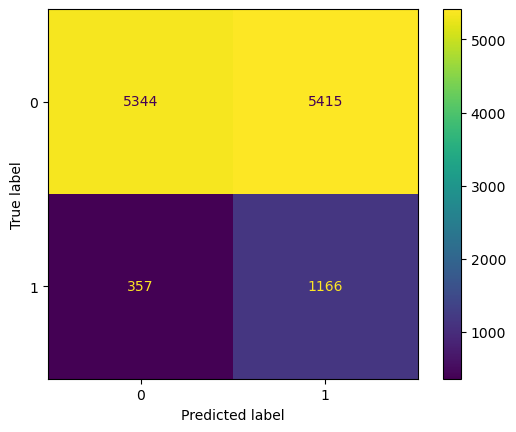

In [8]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
params = {'n_estimators': 140, 'max_depth': 10, 'criterion': 'gini'}
rf.set_params(**params)
rf.fit(rus2_x,rus2_y)
rf_predictions = rf.predict(x_test2)
print("Accuracy of Random Forest:", accuracy_score(y_test2, rf_predictions))
y_rf_prob = rf.predict_proba(x_test2)[:, 1]
roc_rf = roc_curve(y_test2, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))
f1 = f1_score(y_test2,rf_predictions)
print("f1 score of Random Forest:",f1)
cm = confusion_matrix(y_test2, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [9]:
rf.feature_importances_

array([0.00166195, 0.00048548, 0.00031913, 0.00052665, 0.00313923,
       0.00066522, 0.00011062, 0.00536639, 0.01649973, 0.00526332,
       0.0030348 , 0.00265503, 0.00371846, 0.00338208, 0.00864426,
       0.00325543, 0.00411068, 0.00508151, 0.00769116, 0.00361122,
       0.00395226, 0.0059294 , 0.00294594, 0.00250208, 0.00326603,
       0.00318319, 0.00231318, 0.00545436, 0.00330027, 0.00217808,
       0.00301314, 0.0033573 , 0.00367777, 0.00483812, 0.00474352,
       0.0051095 , 0.00610797, 0.00478561, 0.00678235, 0.00665524,
       0.00966646, 0.00465991, 0.00448519, 0.00538418, 0.00555468,
       0.0049862 , 0.00510594, 0.00661476, 0.00619394, 0.00560057,
       0.00518462, 0.00530414, 0.00596257, 0.00500042, 0.00606623,
       0.00655824, 0.00618496, 0.00515578, 0.0067956 , 0.00617942,
       0.00498033, 0.00812528, 0.00941616, 0.00604007, 0.00656978,
       0.00502387, 0.00704915, 0.00593127, 0.00581203, 0.00520174,
       0.00609677, 0.01158772, 0.0099549 , 0.00533611, 0.00536

In [26]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=90,max_depth=4)

Accuracy of Random Forest: 0.6086956521739131
AUC of Random Forest: 0.6480932117666365
f1 score of Random Forest: 0.2785950165115581


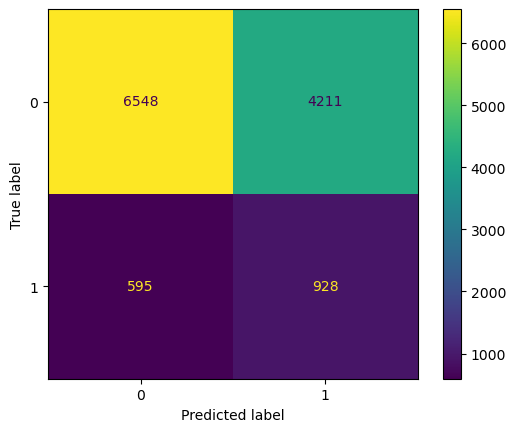

In [27]:
bst.fit(rus2_x,rus2_y)
bst_predictions = bst.predict(x_test2)
print("Accuracy of Random Forest:", accuracy_score(y_test2, bst_predictions))
y_bst_prob = bst.predict_proba(x_test2)[:, 1]
roc_bst = roc_curve(y_test2, y_bst_prob)
print("AUC of Random Forest:", auc(roc_bst[0], roc_bst[1]))
f1 = f1_score(y_test2,bst_predictions)
print("f1 score of Random Forest:",f1)
cm = confusion_matrix(y_test2, bst_predictions, labels=bst.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=bst.classes_)
disp.plot()
plt.show()

In [7]:
import pickle
with open("RUS3.pickle", "rb") as file:
    rus3_x, rus3_y = pickle.load(file)
test3 = pd.read_csv("test3.csv")
x_test3 = test3.drop(['aa_ProtPosition', 'domain','p_interface','uniprot_id','Rlength'], axis=1)
y_test3 = test3.p_interface

Accuracy of Random Forest: 0.595098518156652
AUC of Random Forest: 0.7119600643404593
f1 score of Random Forest: 0.30651234137498257


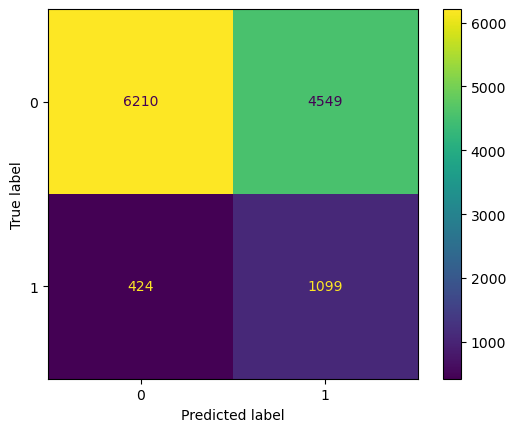

In [25]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
params = {'n_estimators': 180, 'max_depth': 10, 'criterion': 'gini'}
rf.set_params(**params)
rf.fit(rus3_x,rus3_y)
rf_predictions = rf.predict(x_test3)
print("Accuracy of Random Forest:", accuracy_score(y_test3, rf_predictions))
y_rf_prob = rf.predict_proba(x_test3)[:, 1]
roc_rf = roc_curve(y_test3, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))
f1 = f1_score(y_test3,rf_predictions)
print("f1 score of Random Forest:",f1)
cm = confusion_matrix(y_test3, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [26]:
rf.feature_importances_

array([0.00471565, 0.12352399, 0.00468366, 0.0134605 , 0.00597221,
       0.00265534, 0.00304216, 0.00281026, 0.00251898, 0.00694677,
       0.00262439, 0.00289649, 0.0044553 , 0.00804491, 0.00382616,
       0.00346069, 0.00526954, 0.00264897, 0.00253697, 0.00337632,
       0.00310302, 0.00233069, 0.00380379, 0.00287763, 0.00203413,
       0.002499  , 0.00297251, 0.003828  , 0.00404412, 0.00461473,
       0.00586691, 0.00603739, 0.00514611, 0.00609885, 0.00555309,
       0.00848188, 0.00461123, 0.00468404, 0.00478025, 0.00517153,
       0.0043719 , 0.00430106, 0.00562169, 0.00595282, 0.00426119,
       0.0056805 , 0.00460437, 0.00542004, 0.00451144, 0.00504315,
       0.0055705 , 0.00632232, 0.00482933, 0.00557871, 0.00434484,
       0.00458243, 0.00625855, 0.00683227, 0.00487037, 0.00566146,
       0.00569255, 0.00535215, 0.00517923, 0.00486474, 0.00471405,
       0.00514888, 0.01116207, 0.00895112, 0.00473804, 0.00494482,
       0.00456272, 0.00657442, 0.00526352, 0.00636801, 0.00592

In [27]:
cv = StratifiedKFold(5)
min_features_to_select = 1
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select
)
rfecv.fit(rus3_x, rus3_y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 132


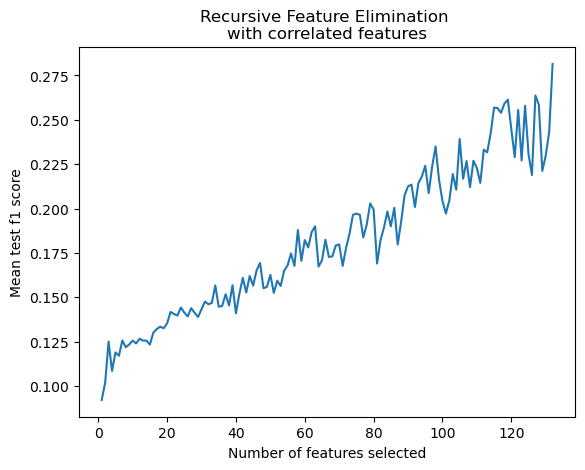

In [29]:
cv_results = pd.DataFrame(rfecv.cv_results_)
cv_results["n_features"] = list(range(1,133))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test f1 score")
plt.plot(cv_results["n_features"],cv_results["mean_test_score"])
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [97]:
feature_importance = zip(rf.feature_names_in_,rf.feature_importances_)

In [98]:
lst =list(feature_importance)

In [100]:
lst =list(feature_importance)
lst = dict(lst)

In [105]:
keys = list(lst.keys())
vals = list(lst.values())

lst['wm_normalized_abs_surf_acc'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_normalized_abs_surf_acc'):
        lst['wm_normalized_abs_surf_acc'] += lst[keys[i]]


lst['wm_normalized_hydropathy_index'] = 0
for i in  range(len(keys)):
    if keys[i].endswith('wm_normalized_hydropathy_index'):
        lst['wm_normalized_hydropathy_index'] += lst[keys[i]]


lst['wm_rel_surf_acc'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_rel_surf_acc'):
        lst['wm_rel_surf_acc'] += lst[keys[i]]


lst['wm_prob_sheet'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_sheet'):
        lst['wm_prob_sheet'] += lst[keys[i]]


lst['wm_prob_helix'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_helix'):
        lst['wm_prob_helix'] += lst[keys[i]]


lst['wm_prob_coil'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_coil'):
        lst['wm_prob_coil'] += lst[keys[i]]


lst['wm_pssm_A'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_A'):
        lst['wm_pssm_A'] += lst[keys[i]]


lst['wm_pssm_R'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_R'):
        lst['wm_pssm_R'] += lst[keys[i]]


lst['wm_pssm_N'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_N'):
        lst['wm_pssm_N'] += lst[keys[i]]


lst['wm_pssm_D'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_D'):
        lst['wm_pssm_D'] += lst[keys[i]]


lst['wm_pssm_C'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_C'):
        lst['wm_pssm_C'] += lst[keys[i]]


lst['wm_pssm_Q'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_Q'):
        lst['wm_pssm_Q'] += lst[keys[i]]


lst['wm_pssm_E'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_E'):
        lst['wm_pssm_E'] += lst[keys[i]]


lst['wm_pssm_G'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_G'):
        lst['wm_pssm_G'] += lst[keys[i]]


lst['wm_pssm_H'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_H'):
        lst['wm_pssm_H'] += lst[keys[i]]


lst['wm_pssm_I'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_I'):
        lst['wm_pssm_I'] += lst[keys[i]]


lst['wm_pssm_L'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_L'):
        lst['wm_pssm_L'] += lst[keys[i]]


lst['wm_pssm_K'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_K'):
        lst['wm_pssm_K'] += lst[keys[i]]


lst['wm_pssm_M'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_M'):
        lst['wm_pssm_M'] += lst[keys[i]]


lst['wm_pssm_F'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_F'):
        lst['wm_pssm_F'] += lst[keys[i]]


lst['wm_pssm_P'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_P'):
        lst['wm_pssm_P'] += lst[keys[i]]


lst['wm_pssm_S'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_S'):
        lst['wm_pssm_S'] += lst[keys[i]]


lst['wm_pssm_T'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_T'):
        lst['wm_pssm_T'] += lst[keys[i]]


lst['wm_pssm_W'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_W'):
        lst['wm_pssm_W'] += lst[keys[i]]


lst['wm_pssm_Y'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_Y'):
        lst['wm_pssm_Y'] += lst[keys[i]]


lst['wm_pssm_V'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_V'):
        lst['wm_pssm_V'] += lst[keys[i]]

for i in range(len(keys)):
    if keys[i].startswith('3_wm') or keys[i].startswith('5_wm') or keys[i].startswith('7_wm') or keys[i].startswith('9_wm'):
        del lst[keys[i]]

Text(0.5, 1.0, 'Feature Importance of aaCluster Model')

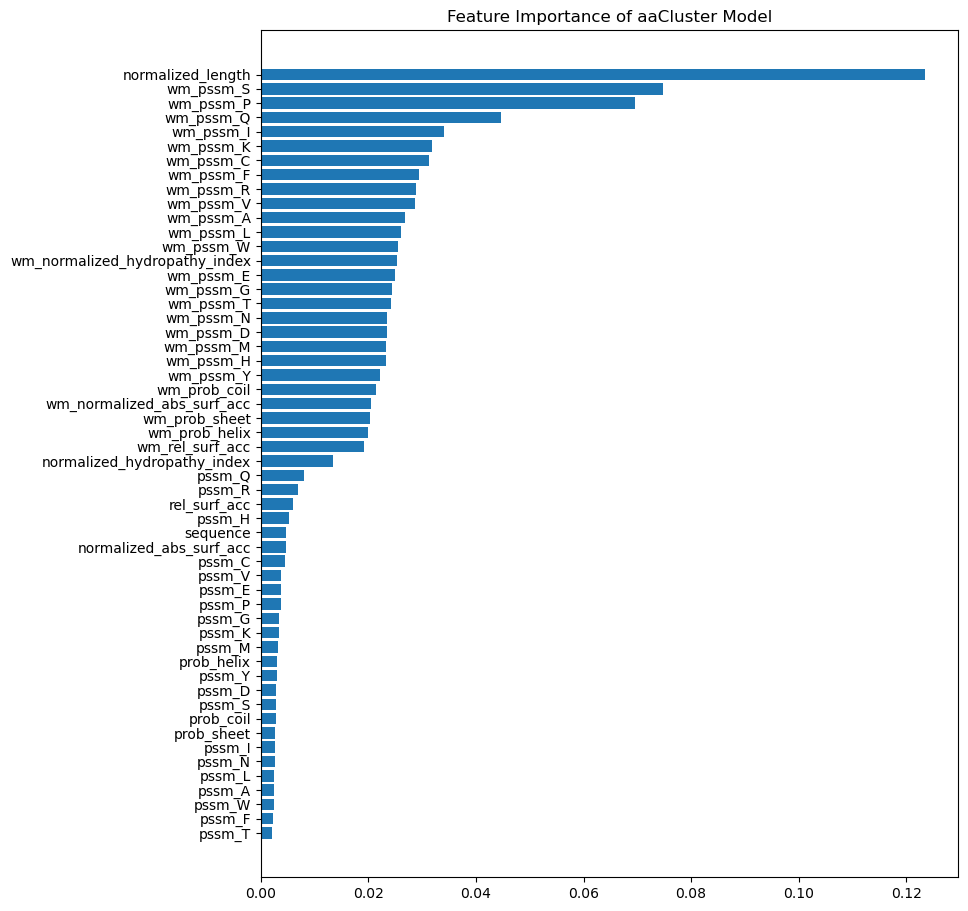

In [128]:
names = list(lst.keys())
importance = list(lst.values())
sorted_idx = np.argsort(importance)
fig = plt.figure(figsize=(9, 11))
plt.barh(range(len(sorted_idx)), np.array(importance)[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(names)[sorted_idx])
plt.title('Feature Importance of aaCluster Model')

In [146]:
with open("RUS4.pickle", "rb") as file:
    rus4_x, rus4_y = pickle.load(file)
test4 = pd.read_csv("test4.csv")
x_test4 = test4.drop(['aa_ProtPosition', 'domain','p_interface','uniprot_id','Rlength'], axis=1)
y_test4 = test4.p_interface

Accuracy of Random Forest: 0.6039732942517505
AUC of Random Forest: 0.7114671422609006
f1 score of Random Forest: 0.3090909090909091


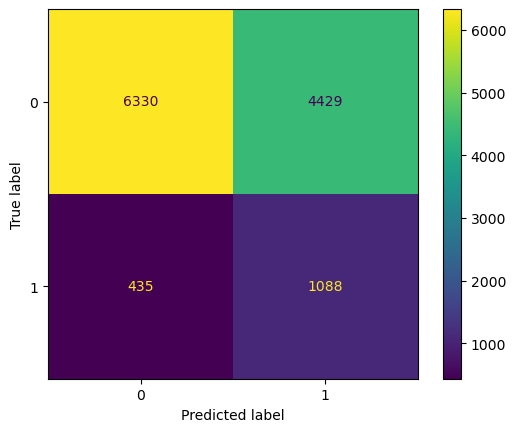

In [147]:
rf = RandomForestClassifier(random_state=0,n_jobs=-1)
params = {'n_estimators': 140, 'max_depth': 10, 'criterion': 'gini'}
rf.set_params(**params)
rf.fit(rus4_x,rus4_y)
rf_predictions = rf.predict(x_test4)
print("Accuracy of Random Forest:", accuracy_score(y_test4, rf_predictions))
y_rf_prob = rf.predict_proba(x_test4)[:, 1]
roc_rf = roc_curve(y_test4, y_rf_prob)
print("AUC of Random Forest:", auc(roc_rf[0], roc_rf[1]))
f1 = f1_score(y_test4,rf_predictions)
print("f1 score of Random Forest:",f1)
cm = confusion_matrix(y_test4, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [148]:
feature_importance = zip(rf.feature_names_in_,rf.feature_importances_)
lst =list(feature_importance)
lst = dict(lst)

In [149]:
keys = list(lst.keys())
vals = list(lst.values())

lst['wm_normalized_abs_surf_acc'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_normalized_abs_surf_acc'):
        lst['wm_normalized_abs_surf_acc'] += lst[keys[i]]


lst['wm_normalized_hydropathy_index'] = 0
for i in  range(len(keys)):
    if keys[i].endswith('wm_normalized_hydropathy_index'):
        lst['wm_normalized_hydropathy_index'] += lst[keys[i]]


lst['wm_rel_surf_acc'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_rel_surf_acc'):
        lst['wm_rel_surf_acc'] += lst[keys[i]]


lst['wm_prob_sheet'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_sheet'):
        lst['wm_prob_sheet'] += lst[keys[i]]


lst['wm_prob_helix'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_helix'):
        lst['wm_prob_helix'] += lst[keys[i]]


lst['wm_prob_coil'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_prob_coil'):
        lst['wm_prob_coil'] += lst[keys[i]]


lst['wm_pssm_A'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_A'):
        lst['wm_pssm_A'] += lst[keys[i]]


lst['wm_pssm_R'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_R'):
        lst['wm_pssm_R'] += lst[keys[i]]


lst['wm_pssm_N'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_N'):
        lst['wm_pssm_N'] += lst[keys[i]]


lst['wm_pssm_D'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_D'):
        lst['wm_pssm_D'] += lst[keys[i]]


lst['wm_pssm_C'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_C'):
        lst['wm_pssm_C'] += lst[keys[i]]


lst['wm_pssm_Q'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_Q'):
        lst['wm_pssm_Q'] += lst[keys[i]]


lst['wm_pssm_E'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_E'):
        lst['wm_pssm_E'] += lst[keys[i]]


lst['wm_pssm_G'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_G'):
        lst['wm_pssm_G'] += lst[keys[i]]


lst['wm_pssm_H'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_H'):
        lst['wm_pssm_H'] += lst[keys[i]]


lst['wm_pssm_I'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_I'):
        lst['wm_pssm_I'] += lst[keys[i]]


lst['wm_pssm_L'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_L'):
        lst['wm_pssm_L'] += lst[keys[i]]


lst['wm_pssm_K'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_K'):
        lst['wm_pssm_K'] += lst[keys[i]]


lst['wm_pssm_M'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_M'):
        lst['wm_pssm_M'] += lst[keys[i]]


lst['wm_pssm_F'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_F'):
        lst['wm_pssm_F'] += lst[keys[i]]


lst['wm_pssm_P'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_P'):
        lst['wm_pssm_P'] += lst[keys[i]]


lst['wm_pssm_S'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_S'):
        lst['wm_pssm_S'] += lst[keys[i]]


lst['wm_pssm_T'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_T'):
        lst['wm_pssm_T'] += lst[keys[i]]


lst['wm_pssm_W'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_W'):
        lst['wm_pssm_W'] += lst[keys[i]]


lst['wm_pssm_Y'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_Y'):
        lst['wm_pssm_Y'] += lst[keys[i]]


lst['wm_pssm_V'] = 0
for i in range(len(keys)):
    if keys[i].endswith('wm_pssm_V'):
        lst['wm_pssm_V'] += lst[keys[i]]

for i in range(len(keys)):
    if keys[i].startswith('3_wm') or keys[i].startswith('5_wm') or keys[i].startswith('7_wm') or keys[i].startswith('9_wm'):
        del lst[keys[i]]

Text(0.5, 1.0, 'Feature Importance of aaCluster Model')

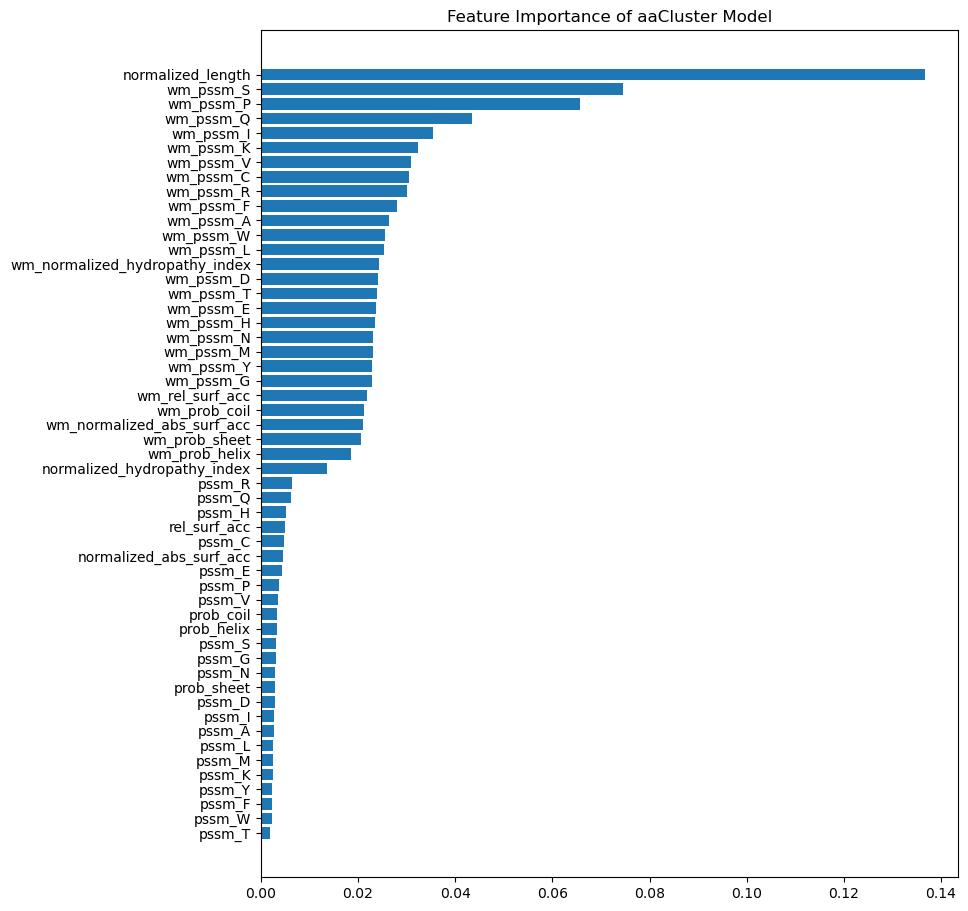

In [150]:
names = list(lst.keys())
importance = list(lst.values())
sorted_idx = np.argsort(importance)
fig = plt.figure(figsize=(9, 11))
plt.barh(range(len(sorted_idx)), np.array(importance)[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(names)[sorted_idx])
plt.title('Feature Importance of aaCluster Model')